In [27]:
import pandas as pd
train_df = pd.read_csv('Train.csv')
train_df.head()

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),...,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years)
0,Male,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,...,NaN,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,NaN,Medium,89
1,Male,172.946206,79.641937,134/112,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,...,Heart Disease,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77
2,Female,155.945488,49.167058,160/101,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,...,Hypertension,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,NaN,Medium,70
3,Female,169.078298,56.017921,133/94,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,...,Hypertension,55.196092,Poor,Insomnia,4.693446,7.555511,2.745578,NaN,Low,52
4,Female,163.758355,73.966304,170/106,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,...,NaN,53.023379,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79


In [28]:
clean_df = train_df.drop(["Gender","Smoking Status", "Alcohol Consumption", "Diet", "Family History", "Mental Health Status", "Sleep Patterns", "Stress Levels", "Pollution Exposure", "Sun Exposure", "Income Level"], axis='columns')
clean_df.head()

,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,Chronic Diseases,Medication Use,Cognitive Function,Education Level,Age (years)
0,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,Moderate,NaN,NaN,44.059172,NaN,89
1,172.946206,79.641937,134/112,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,Low,Hypertension,NaN,45.312298,Undergraduate,77
2,155.945488,49.167058,160/101,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,Moderate,Hypertension,Regular,56.246991,NaN,70
3,169.078298,56.017921,133/94,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,Moderate,Diabetes,Occasional,55.196092,NaN,52
4,163.758355,73.966304,170/106,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,Low,NaN,NaN,53.023379,Undergraduate,79


In [29]:


columns_with_empty_cells = clean_df.columns[clean_df.isna().any()].tolist()
columns_with_empty_cells

['Chronic Diseases', 'Medication Use', 'Education Level']

In [30]:


i=1
for col in columns_with_empty_cells:
    clean_df[col] = clean_df[col].fillna(f"None{i}")
    i+=1
clean_df.head()

,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,Chronic Diseases,Medication Use,Cognitive Function,Education Level,Age (years)
0,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,Moderate,None1,None2,44.059172,None3,89
1,172.946206,79.641937,134/112,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,Low,Hypertension,None2,45.312298,Undergraduate,77
2,155.945488,49.167058,160/101,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,Moderate,Hypertension,Regular,56.246991,None3,70
3,169.078298,56.017921,133/94,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,Moderate,Diabetes,Occasional,55.196092,None3,52
4,163.758355,73.966304,170/106,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,Low,None1,None2,53.023379,Undergraduate,79


In [31]:


clean_df[['Systolic Blood Pressure', 'Diastolic Blood Pressure']] = clean_df["Blood Pressure (s/d)"].str.split('/', expand=True)
clean_df.head()

,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,Chronic Diseases,Medication Use,Cognitive Function,Education Level,Age (years),Systolic Blood Pressure,Diastolic Blood Pressure
0,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,Moderate,None1,None2,44.059172,None3,89,151,109
1,172.946206,79.641937,134/112,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,Low,Hypertension,None2,45.312298,Undergraduate,77,134,112
2,155.945488,49.167058,160/101,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,Moderate,Hypertension,Regular,56.246991,None3,70,160,101
3,169.078298,56.017921,133/94,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,Moderate,Diabetes,Occasional,55.196092,None3,52,133,94
4,163.758355,73.966304,170/106,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,Low,None1,None2,53.023379,Undergraduate,79,170,106


In [32]:


clean_df['Systolic Blood Pressure'] = clean_df['Systolic Blood Pressure'].astype(int)
clean_df['Diastolic Blood Pressure'] = clean_df['Diastolic Blood Pressure'].astype(int)
clean_df.pop("Blood Pressure (s/d)")
clean_df.head()

,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,Chronic Diseases,Medication Use,Cognitive Function,Education Level,Age (years),Systolic Blood Pressure,Diastolic Blood Pressure
0,171.148359,86.185197,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,Moderate,None1,None2,44.059172,None3,89,151,109
1,172.946206,79.641937,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,Low,Hypertension,None2,45.312298,Undergraduate,77,134,112
2,155.945488,49.167058,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,Moderate,Hypertension,Regular,56.246991,None3,70,160,101
3,169.078298,56.017921,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,Moderate,Diabetes,Occasional,55.196092,None3,52,133,94
4,163.758355,73.966304,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,Low,None1,None2,53.023379,Undergraduate,79,170,106


In [33]:


# One-hot encode categorical variables
categorical_columns = ["Chronic Diseases", "Medication Use", "Education Level", "Physical Activity Level"]

# Use pandas get_dummies function to one-hot encode the categorical variables
clean_df = pd.get_dummies(clean_df, columns=categorical_columns)

# Display the transformed dataframe
clean_df.head()

,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Cognitive Function,Age (years),...,Medication Use_None2,Medication Use_Occasional,Medication Use_Regular,Education Level_High School,Education Level_None3,Education Level_Postgraduate,Education Level_Undergraduate,Physical Activity Level_High,Physical Activity Level_Low,Physical Activity Level_Moderate
0,171.148359,86.185197,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,44.059172,89,...,True,False,False,False,True,False,False,False,False,True
1,172.946206,79.641937,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,45.312298,77,...,True,False,False,False,False,False,True,False,True,False
2,155.945488,49.167058,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,56.246991,70,...,False,False,True,False,True,False,False,False,False,True
3,169.078298,56.017921,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,55.196092,52,...,False,True,False,False,True,False,False,False,False,True
4,163.758355,73.966304,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,53.023379,79,...,True,False,False,False,False,False,True,False,True,False


In [34]:


xtrain = clean_df.drop("Age (years)", axis="columns")
xtrain.head()

,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Cognitive Function,Systolic Blood Pressure,...,Medication Use_None2,Medication Use_Occasional,Medication Use_Regular,Education Level_High School,Education Level_None3,Education Level_Postgraduate,Education Level_Undergraduate,Physical Activity Level_High,Physical Activity Level_Low,Physical Activity Level_Moderate
0,171.148359,86.185197,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,44.059172,151,...,True,False,False,False,True,False,False,False,False,True
1,172.946206,79.641937,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,45.312298,134,...,True,False,False,False,False,False,True,False,True,False
2,155.945488,49.167058,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,56.246991,160,...,False,False,True,False,True,False,False,False,False,True
3,169.078298,56.017921,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,55.196092,133,...,False,True,False,False,True,False,False,False,False,True
4,163.758355,73.966304,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,53.023379,170,...,True,False,False,False,False,False,True,False,True,False


In [35]:


yTrain = clean_df["Age (years)"]
yTrain.head()

,Age (years)
0,89
1,77
2,70
3,52
4,79


In [36]:


from torch import nn, Tensor, optim
xTrainNumpy = xtrain.to_numpy()
yTrainNumpy = yTrain.to_numpy()

In [37]:


xTrainNumpy.shape

(3000, 25)

In [38]:


yTrainNumpy.shape

(3000,)

In [39]:

import torch.nn.functional as F
class AgePredictionNN(nn.Module):
    def __init__(self):
        super(AgePredictionNN, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(25, 64)
        self.ln1 = nn.LayerNorm(64)
        self.dropout1 = nn.Dropout(0.2)

        self.fc2 = nn.Linear(64, 16)
        self.ln2 = nn.LayerNorm(16)
        self.dropout2 = nn.Dropout(0.1)

        self.fc3 = nn.Linear(16, 1)

        # Initialize weights
        self._init_weights()

    def _init_weights(self):
        # Kaiming initialization for layers with GELU
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='leaky_relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='leaky_relu')
        # Xavier initialization for output layer
        nn.init.xavier_normal_(self.fc3.weight)

        # Initialize biases to small values
        nn.init.zeros_(self.fc1.bias)
        nn.init.zeros_(self.fc2.bias)
        nn.init.zeros_(self.fc3.bias)

    def forward(self, x):
        # First layer with LayerNorm and Dropout
        identity = x  # For potential skip connection in future layers

        outHiddenLayer1 = self.fc1(x)
        outHiddenLayer1 = self.ln1(outHiddenLayer1)
        # Using GELU as a more modern activation function
        activate1 = F.gelu(outHiddenLayer1)
        activate1 = self.dropout1(activate1)

        # Second layer with LayerNorm, Dropout and skip connection
        outHiddenLayer2 = self.fc2(activate1)
        outHiddenLayer2 = self.ln2(outHiddenLayer2)
        activate2 = F.gelu(outHiddenLayer2)
        activate2 = self.dropout2(activate2)

        # Skip connection isn't directly applicable here due to dimension mismatch
        # but we could project identity if needed

        # Output layer
        outHiddenLayer3 = self.fc3(activate2)
        return outHiddenLayer3

In [60]:
# change device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AgePredictionNN().to(device)
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=3e-4)

In [61]:
import numpy as np
import torch

xTrainNumpy = np.array(xTrainNumpy, dtype=np.float32)
xTrainNumpy[xTrainNumpy == True] = 1
xTrainNumpy[xTrainNumpy == False] = 0

xTrainTensor = torch.tensor(xTrainNumpy, dtype=torch.float32)
yTrainTensor = torch.tensor(yTrainNumpy, dtype=torch.float32)

print(xTrainTensor)

tensor([[171.1484,  86.1852, 259.4658,  ...,   0.0000,   0.0000,   1.0000],
        [172.9462,  79.6419, 263.6303,  ...,   0.0000,   1.0000,   0.0000],
        [155.9455,  49.1671, 207.8462,  ...,   0.0000,   0.0000,   1.0000],
        ...,
        [177.8577,  86.2589, 238.6415,  ...,   0.0000,   0.0000,   1.0000],
        [162.2872,  41.3710, 198.2443,  ...,   0.0000,   0.0000,   1.0000],
        [175.3417,  78.7180, 279.1182,  ...,   1.0000,   0.0000,   0.0000]])


In [62]:
print("Shape of xTrainTensor:", xTrainTensor.shape)
print("Shape of yTrainTensor:", yTrainTensor.shape)

Shape of xTrainTensor: torch.Size([3000, 25])
Shape of yTrainTensor: torch.Size([3000])


In [63]:
import torch
num_epoch = 10000
training_losses = []
loss_history = []
tolerance = 5
xTrainTensor = torch.tensor(xTrainNumpy, dtype=torch.float32)
yTrainTensor = torch.tensor(yTrainNumpy, dtype=torch.float32)
# put xtrain and ytrain on device
xTrainTensor = xTrainTensor.to(device)
yTrainTensor = yTrainTensor.to(device)

for epoch in range(1,num_epoch+1):
    predict = model(xTrainTensor)
    loss = criterion(predict.squeeze(), yTrainTensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    current_loss:float = loss.item()
    loss_history.append(round(current_loss, 2))
    if len(loss_history)>5:
        if all(loss_history[-1] == last_loss for last_loss in loss_history[-tolerance-1:-1]):
            print(f"Training completed, Epoch: {epoch}, Final Loss: {current_loss:.4f}")
            break
    print(f'Epoch [{epoch}/{num_epoch}], Loss: {current_loss:.4f}')

Streaming output truncated to the last 5000 lines.
Epoch [5001/10000], Loss: 494.1620
Epoch [5002/10000], Loss: 501.8937
Epoch [5003/10000], Loss: 502.3541
Epoch [5004/10000], Loss: 507.4970
Epoch [5005/10000], Loss: 506.7163
Epoch [5006/10000], Loss: 509.0202
Epoch [5007/10000], Loss: 504.8919
Epoch [5008/10000], Loss: 508.4955
Epoch [5009/10000], Loss: 504.8350
Epoch [5010/10000], Loss: 514.5621
Epoch [5011/10000], Loss: 509.7013
Epoch [5012/10000], Loss: 499.6158
Epoch [5013/10000], Loss: 500.9186
Epoch [5014/10000], Loss: 500.2177
Epoch [5015/10000], Loss: 502.2192
Epoch [5016/10000], Loss: 504.0491
Epoch [5017/10000], Loss: 497.2339
Epoch [5018/10000], Loss: 497.6298
Epoch [5019/10000], Loss: 507.0522
Epoch [5020/10000], Loss: 501.9834
Epoch [5021/10000], Loss: 499.0476
Epoch [5022/10000], Loss: 494.0682
Epoch [5023/10000], Loss: 497.9457
Epoch [5024/10000], Loss: 494.4751
Epoch [5025/10000], Loss: 500.2710
Epoch [5026/10000], Loss: 501.0488
Epoch [5027/10000], Loss: 488.8400
Epoc

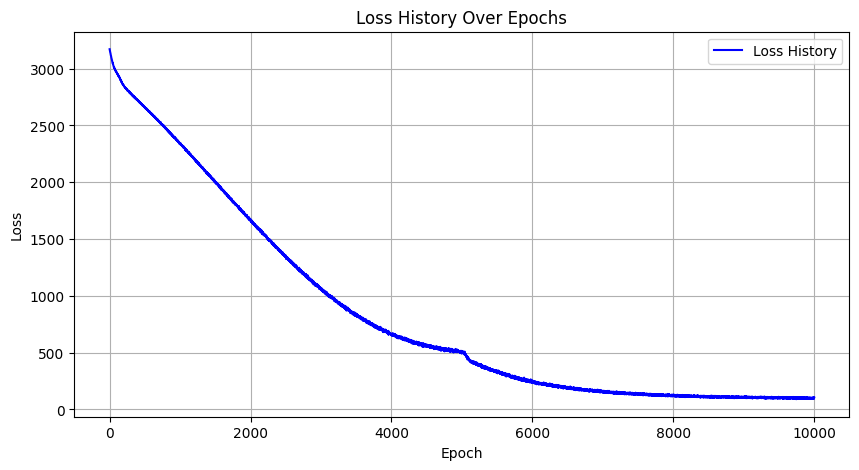

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Loss History', color='blue')
plt.title('Loss History Over Epochs')
plt.xlabel('Epoch')  # X-axis label
plt.ylabel('Loss')  # Y-axis label
plt.legend()
plt.grid()
plt.show()

In [65]:
def data_cleaner(file_name):
    train_df = pd.read_csv(file_name)
    clean_df = train_df.drop(["Gender","Smoking Status", "Alcohol Consumption", "Diet", "Family History", "Mental Health Status", "Sleep Patterns", "Stress Levels", "Pollution Exposure", "Sun Exposure", "Income Level"], axis='columns')
    columns_with_empty_cells = clean_df.columns[clean_df.isna().any()].tolist()
    i=1

    for col in columns_with_empty_cells:
        clean_df[col] = clean_df[col].fillna(f"None{i}")
        i+=1
    clean_df[['Systolic Blood Pressure', 'Diastolic Blood Pressure']] = clean_df["Blood Pressure (s/d)"].str.split('/', expand=True)
    clean_df['Systolic Blood Pressure'] = clean_df['Systolic Blood Pressure'].astype(int)
    clean_df['Diastolic Blood Pressure'] = clean_df['Diastolic Blood Pressure'].astype(int)
    clean_df.pop("Blood Pressure (s/d)")

    # Handle categorical variables manually instead of using pd.get_dummies
    categorical_columns = ["Chronic Diseases", "Medication Use", "Education Level", "Physical Activity Level"]

    for cat_col in categorical_columns:
        unique_values = clean_df[cat_col].unique()
        for value in unique_values:
            if pd.notna(value):  # Skip NaN values
                col_name = f"{value}"
                clean_df[col_name] = (clean_df[cat_col] == value).astype(int)
        clean_df.pop(cat_col)

    xdf = clean_df
    xNumpy = xdf.to_numpy()

    xNumpy = np.array(xNumpy, dtype=np.float32)
    xNumpy[xNumpy == True] = 1
    xNumpy[xNumpy == False] = 0

    xTensor = torch.tensor(xNumpy, dtype=torch.float32)

    return xTensor

In [66]:
xTestTensor = data_cleaner('Test.csv')
# change device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
xTestTensor = xTestTensor.to(device)

In [67]:
# check device of model and xTestTensor
print(next(model.parameters()).device)
print(xTestTensor.device)

cuda:0
cuda:0


In [68]:
# evalute on test set
model.eval()
with torch.no_grad():
    predictions = model(xTestTensor)

# print predictions
print(predictions)

tensor([[79.7560],
        [71.1430],
        [73.3879],
        ...,
        [75.9043],
        [32.3913],
        [65.2671]], device='cuda:0')


<ipython-input-47-b12886257c97>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('age_predictor.pth'))


In [70]:
# save model
torch.save(model.state_dict(), 'age_predictor.pth')

In [72]:

# Load the saved model from file
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AgePredictionNN()
model.load_state_dict(torch.load('age_predictor.pth',weights_only=True))
model.eval()
model = model.to(device)
xTestTensor = xTestTensor.to(device)

In [73]:

from tabulate import tabulate
import pandas as pd

# Load the training data to get true ages
train_data = pd.read_csv('Train.csv')
train_subset = train_data.iloc[:20]  # Take first 20 samples
true_ages = train_subset['Age (years)'].tolist()

# Create a copy of the data without the 'Age (years)' column for data_cleaner
train_data_copy = train_data.copy()
train_data_copy.pop('Age (years)')
train_data_copy.to_csv('Train_without_age.csv', index=False)

# Use the data_cleaner function to process the training data
train_tensor = data_cleaner('Train_without_age.csv')
train_tensor = train_tensor[:20].to(device)  # Take first 20 samples and move to device

# Get predictions for the subset
model.eval()
with torch.no_grad():
    subset_predictions = model(train_tensor)

# Convert predictions to integers
predicted_ages = subset_predictions.cpu().int().numpy().flatten().tolist()

# Create comparison table with index, true age, and predicted age
comparison_table = [[i + 1, true, pred] for i, (true, pred) in enumerate(zip(true_ages, predicted_ages))]
print(tabulate(comparison_table, headers=["Row", "True Age", "Predicted Age"],
               tablefmt="pretty", stralign="center"))

+-----+----------+---------------+
| Row | True Age | Predicted Age |
+-----+----------+---------------+
|  1  |    89    |      79       |
|  2  |    77    |      71       |
|  3  |    70    |      73       |
|  4  |    52    |      57       |
|  5  |    79    |      76       |
|  6  |    29    |      25       |
|  7  |    76    |      78       |
|  8  |    26    |      27       |
|  9  |    50    |      56       |
| 10  |    77    |      78       |
| 11  |    77    |      77       |
| 12  |    64    |      63       |
| 13  |    65    |      75       |
| 14  |    25    |      23       |
| 15  |    47    |      48       |
| 16  |    26    |      31       |
| 17  |    56    |      60       |
| 18  |    53    |      41       |
| 19  |    76    |      73       |
| 20  |    20    |      29       |
+-----+----------+---------------+
